In [1]:
import boto3
import pandas as pd
from io import StringIO

In [2]:
# Nome do bucket e chave do arquivo CSV no S3
bucket_name = 'victor-mlet-tech-challenge-03'
file_key = 'raw/2024-09-29/healthcare-dataset-stroke-data.csv'

# Cliente S3
s3 = boto3.client('s3')

# Obtém o arquivo CSV/Parquet do S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)
csv_content = response['Body'].read().decode('utf-8')

In [17]:
# Usa o Pandas para ler o CSV/Parquet diretamente da string/memória
df = pd.read_csv(StringIO(csv_content))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
# Verificando tamanho do dataset
df.shape

(5110, 12)

In [19]:
# Verificando dados nulos
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# Verificando a mediana da coluna 'bmi'
df['bmi'].median()

np.float64(28.1)

In [21]:
# Usando a mediana para preencher os dados nulos
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [22]:
# Sem dados nulos após tratamento
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [25]:
df = df[df['gender'] != 'Other']

In [68]:
df.shape

(5109, 12)

In [55]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [56]:
# Criando uma copia de estado do dataset para iniciar o tratamento das colunas com dados categorias e dimensionamento dos númericos
df2 = df.copy()

In [57]:
# Importe e alocação de bibliotecas do scikit learn que serão usadas
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

le = LabelEncoder()
ohe = OneHotEncoder()
mms = MinMaxScaler()

lista_label_encoder = ['gender', 'ever_married', 'Residence_type']
lista_one_hot_encoding = ['work_type', 'smoking_status']
lista_min_max_scaler = ['age', 'avg_glucose_level', 'bmi']
drop_columns = ['id']

In [58]:
# Tratamento de colunas categoricas que tinham apenas dois valores em cada, tornando as categorias em 0 e 1
for i in lista_label_encoder:
    df2[i] = le.fit_transform(df2[i])

In [59]:
# Tratamento com One Hot Encoding, transformando colunas categoricas em multiplas colunas binarias.
df_encoded = ohe.fit_transform(df2[lista_one_hot_encoding])
encoded_array = df_encoded.toarray()
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out())

df3 = pd.concat([df2, encoded_df], axis=1)
df3.drop(['id', 'work_type', 'smoking_status'], axis=1, inplace=True)
df3.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,74.0,1.0,1.0,1.0,0.0,70.09,27.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,69.0,0.0,0.0,0.0,1.0,94.39,22.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,59.0,0.0,0.0,1.0,0.0,76.15,28.1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,78.0,0.0,0.0,1.0,1.0,58.57,24.2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
# Criando mais uma copia de estado do dataset
df4 = df3.copy()

In [61]:
# Aplicação do min max scaler nas colunas de valor númerico num range entre 0 e 1
df4[lista_min_max_scaler] = mms.fit_transform(df4[lista_min_max_scaler])
df4.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.743652,0.0,0.0,1.0,0.0,0.679023,0.203895,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Treinamento

In [ ]:
df4.isna().sum()

In [ ]:
df4 = df4.dropna()

In [ ]:
df4.isna().sum()

In [62]:
df4['stroke'].value_counts(normalize=True)*100

stroke
0.0    95.126248
1.0     4.873752
Name: proportion, dtype: float64

In [63]:
from imblearn.over_sampling import SMOTE

In [74]:
# Separação do dataset
X = df4.drop(['stroke'], axis=1)
y = df4['stroke'].values

In [72]:
smote = SMOTE(random_state=42)

In [75]:
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [76]:
# Parametrizando Modelo de Classificação
modelo_rfc = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=8, random_state=42)

In [77]:
# Aplicando cross val score
scores = cross_val_score(modelo_rfc, X_train, y_train, cv=10, scoring='accuracy')

In [78]:
# Acertividade em cada validação cruzada
scores

array([0.85604113, 0.85218509, 0.86503856, 0.82005141, 0.83526384,
       0.83526384, 0.84298584, 0.84942085, 0.86357786, 0.86229086])

In [79]:
print(f"Acurácia média da validação cruzada: {100*scores.mean():.2f}%")
print(f"Desvio padrão da validação cruzada: {100*scores.std():.2f}%")

Acurácia média da validação cruzada: 84.82%
Desvio padrão da validação cruzada: 1.40%


In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# 1. Treinar o modelo no conjunto de treino completo
modelo_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

In [82]:
# 2. Fazer previsões no conjunto de teste
y_pred = modelo_rfc.predict(X_test)

In [83]:
# 3. Avaliar o desempenho no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {100*accuracy:.2f}%")

Acurácia no conjunto de teste: 85.75%


In [84]:
# Relatório de classificação
print("Relatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test, y_pred))

Relatório de Classificação no Conjunto de Teste:
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85       978
         1.0       0.81      0.94      0.87       966

    accuracy                           0.86      1944
   macro avg       0.87      0.86      0.86      1944
weighted avg       0.87      0.86      0.86      1944



Matriz de Confusão no Conjunto de Teste:


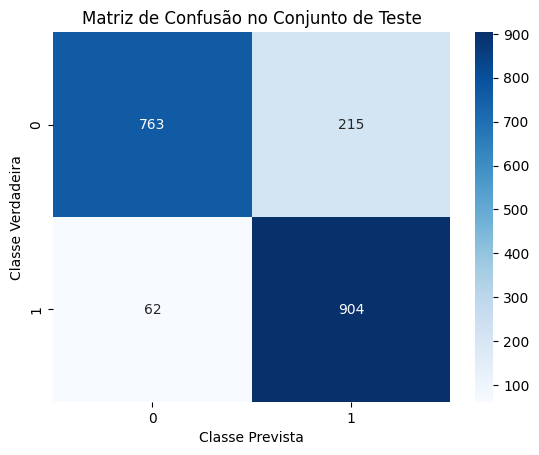

In [85]:
# Matriz de confusão
print("Matriz de Confusão no Conjunto de Teste:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()